In [1]:
# 0️⃣ Combine Yearly World Happiness Reports into One Dataset

import pandas as pd
import glob

# Read all CSV files from data/ folder
csv_files = glob.glob("../data/*.csv")

# Combine them
df_list = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    temp_df['Year'] = file.split("\\")[-1].split(".")[0]  # Extract year from filename
    df_list.append(temp_df)

# Concatenate all years
combined_df = pd.concat(df_list, ignore_index=True)

# Save combined version
combined_df.to_csv("../data/world_happiness.csv", index=False)

print(f"✅ Combined dataset created successfully with {combined_df.shape[0]} rows and {combined_df.shape[1]} columns.")
print("Columns:", list(combined_df.columns)[:10], "...")
print(combined_df.head())


✅ Combined dataset created successfully with 782 rows and 31 columns.
Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)'] ...
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe             1.0            7.587   
1      Iceland  Western Europe             2.0            7.561   
2      Denmark  Western Europe             3.0            7.527   
3       Norway  Western Europe             4.0            7.522   
4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.

In [2]:
# 1️⃣ Importing Libraries & Loading the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization style
sns.set(style="whitegrid")

# Load combined dataset
df = pd.read_csv('../data/world_happiness.csv')

print("### Dataset Info ###")
df.info()

print("\n### Missing Values per Column ###")
print(df.isna().sum())

print("\n### Descriptive Statistics ###")
print(df.describe(include='all').round(2))

# Preview first 5 rows
df.head()


### Dataset Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                         

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 2️⃣ Data Cleaning & Preparation

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop unnecessary columns (if present)
drop_cols = [col for col in df.columns if 'rank' in col or 'region' in col]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Ensure year column is integer
if 'year' in df.columns:
    df['year'] = df['year'].astype(int)

print("After cleaning:")
df.info()
print("\n### Missing Values After Cleaning ###")
print(df.isna().sum())

print("\nSample rows after cleaning:")
df.head()


After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        470 non-null    object 
 1   happiness_score                782 non-null    float64
 2   standard_error                 782 non-null    float64
 3   economy_(gdp_per_capita)       782 non-null    float64
 4   family                         782 non-null    float64
 5   health_(life_expectancy)       782 non-null    float64
 6   freedom                        782 non-null    float64
 7   trust_(government_corruption)  782 non-null    float64
 8   generosity                     782 non-null    float64
 9   dystopia_residual              782 non-null    float64
 10  year                           782 non-null    int64  
 11  lower_confidence_interval      782 non-null    float64
 12  upper_confidence_interval      782

,country,happiness_score,standard_error,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,...,economy..gdp.per.capita.,health..life.expectancy.,trust..government.corruption.,dystopia.residual,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.984718,0.551341,0.12312,1.850238,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.984718,0.551341,0.12312,1.850238,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.984718,0.551341,0.12312,1.850238,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.984718,0.551341,0.12312,1.850238,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.984718,0.551341,0.12312,1.850238,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299


In [7]:
# 3️⃣ Data Normalization – Unify Column Names Across Years

# Create mapping dictionary (old → new)
rename_map = {
    'happiness.score': 'happiness_score',
    'score': 'happiness_score',
    'economy_(gdp_per_capita)': 'gdp_per_capita',
    'economy..gdp.per.capita.': 'gdp_per_capita',
    'health_(life_expectancy)': 'healthy_life_expectancy',
    'health..life.expectancy.': 'healthy_life_expectancy',
    'trust_(government_corruption)': 'perceptions_of_corruption',
    'trust..government.corruption.': 'perceptions_of_corruption',
    'freedom': 'freedom_to_make_life_choices',
    'family': 'social_support'
}

# Apply renaming
df.rename(columns=rename_map, inplace=True)

# Keep only core relevant columns
keep_cols = [
    'country', 'year', 'happiness_score', 'gdp_per_capita', 'social_support',
    'healthy_life_expectancy', 'freedom_to_make_life_choices',
    'generosity', 'perceptions_of_corruption'
]

df = df[keep_cols].copy()

# Drop any duplicates or null rows
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print("After normalization:")
df.info()
print("\nSample preview:")
df.head()


# 3️⃣B – Remove Duplicate Columns (Keep One Copy per Feature)

# Remove exact duplicate columns (same values)
df = df.loc[:, ~df.T.duplicated(keep='first')]

# Optional: ensure correct column order again
expected_cols = [
    'country', 'year', 'happiness_score', 'gdp_per_capita', 'social_support',
    'healthy_life_expectancy', 'freedom_to_make_life_choices',
    'generosity', 'perceptions_of_corruption'
]

# Keep only existing expected columns (some years may not have all)
df = df[[col for col in expected_cols if col in df.columns]]

print("✅ Duplicate columns removed.")
df.info()
print("\nColumns:", list(df.columns))
df.head()


# 3️⃣C – Final Cleanup: Remove Repeated Columns by Name Pattern

# Group columns by their base name (before duplicates)
unique_cols = []
for col in df.columns:
    base = col.strip().split('.')[0]
    if base not in [c.split('.')[0] for c in unique_cols]:
        unique_cols.append(col)

# Keep only the first occurrence of each repeated feature
df = df[unique_cols].copy()

# Rename again to standard names (final)
df.rename(columns={
    'happiness_score': 'happiness_score',
    'gdp_per_capita': 'gdp_per_capita',
    'social_support': 'social_support',
    'healthy_life_expectancy': 'healthy_life_expectancy',
    'freedom_to_make_life_choices': 'freedom_to_make_life_choices',
    'generosity': 'generosity',
    'perceptions_of_corruption': 'perceptions_of_corruption'
}, inplace=True)

print("✅ Final column cleanup complete.")
print(df.info())
print("\nColumns:", list(df.columns))
print("\nSample preview:")
df.head()


# 3️⃣D – Merge Duplicate Columns by Taking Non-Null Values

import numpy as np

# Group duplicate columns by base name
def merge_duplicate_columns(df):
    merged_df = pd.DataFrame()
    seen = {}
    for col in df.columns:
        base = col.split('.')[0]
        if base not in seen:
            duplicates = [c for c in df.columns if c.split('.')[0] == base]
            merged_col = df[duplicates].bfill(axis=1).iloc[:, 0]  # take first non-null value
            merged_df[base] = merged_col
            seen[base] = True
    return merged_df

# Apply merge
df = merge_duplicate_columns(df)

print("✅ Merged duplicate columns successfully.")
print(df.info())
print("\nColumns:", list(df.columns))
df.head()




After normalization:
<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 469
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       470 non-null    object 
 1   year                          470 non-null    int64  
 2   happiness_score               470 non-null    float64
 3   happiness_score               470 non-null    float64
 4   happiness_score               470 non-null    float64
 5   gdp_per_capita                470 non-null    float64
 6   gdp_per_capita                470 non-null    float64
 7   gdp_per_capita                470 non-null    float64
 8   social_support                470 non-null    float64
 9   social_support                470 non-null    float64
 10  healthy_life_expectancy       470 non-null    float64
 11  healthy_life_expectancy       470 non-null    float64
 12  healthy_life_expectancy       470 non-null    fl

,country,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Switzerland,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


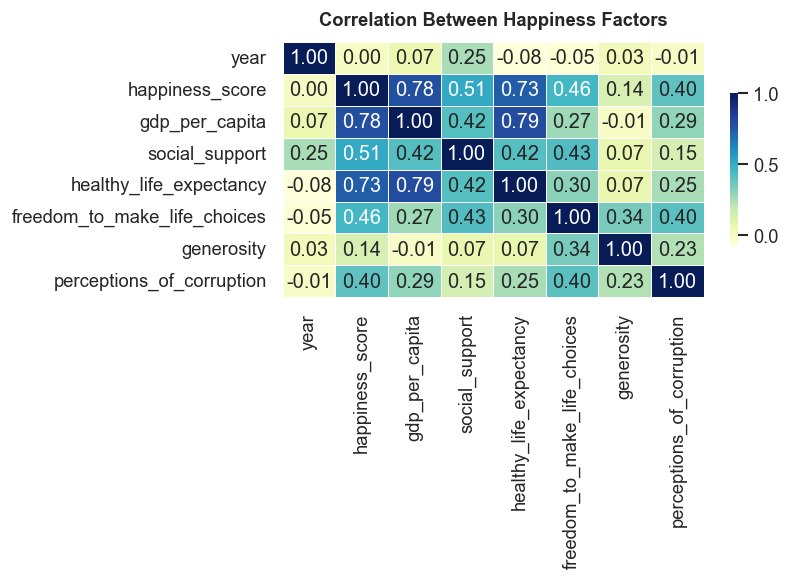

In [9]:
# 4️⃣ Correlation Heatmap – Compact Version for Web Display

plt.figure(figsize=(7, 5), dpi=120)
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.4,
    cbar_kws={"shrink": 0.6}
)

plt.title("Correlation Between Happiness Factors", fontsize=11, weight='bold', pad=10)
plt.tight_layout()
plt.savefig("../assets/happiness_correlation_heatmap.png", dpi=200, bbox_inches='tight', transparent=True)
plt.show()


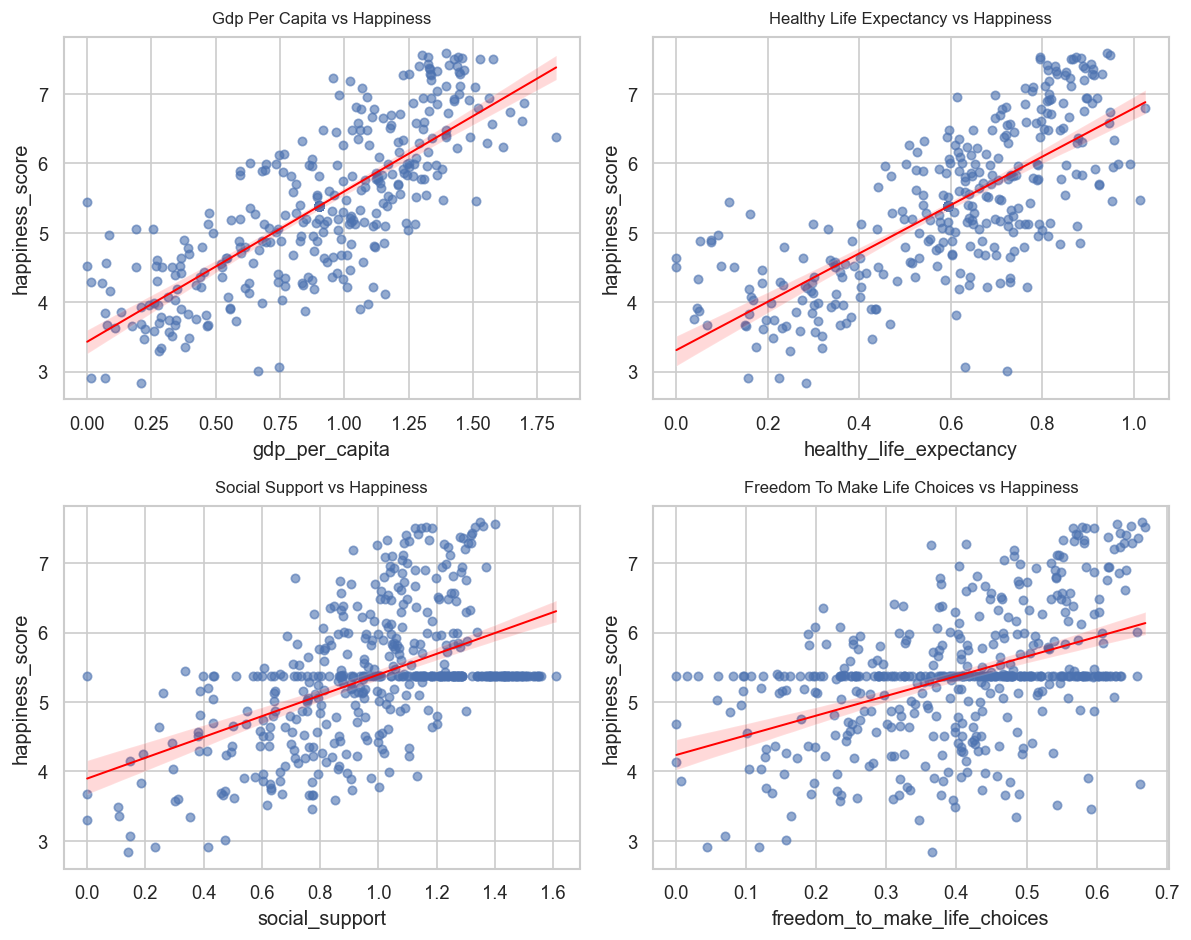

In [10]:
# 5️⃣ Scatter Analysis – Top Factors vs Happiness Score

factors = ['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 'freedom_to_make_life_choices']

plt.figure(figsize=(10, 8), dpi=120)

for i, factor in enumerate(factors, 1):
    plt.subplot(2, 2, i)
    sns.regplot(
        data=df,
        x=factor,
        y='happiness_score',
        scatter_kws={'s': 25, 'alpha': 0.6},
        line_kws={'color': 'red', 'linewidth': 1.2}
    )
    plt.title(f'{factor.replace("_", " ").title()} vs Happiness', fontsize=10, pad=8)

plt.tight_layout()
plt.savefig("../assets/happiness_factors_scatter.png", dpi=200, bbox_inches='tight', transparent=True)
plt.show()


📈 Linear Regression Model Summary

                        Feature  Coefficient
0                gdp_per_capita        1.345
3  freedom_to_make_life_choices        1.240
1       healthy_life_expectancy        1.140
2                social_support        0.360

R² Score: 0.708


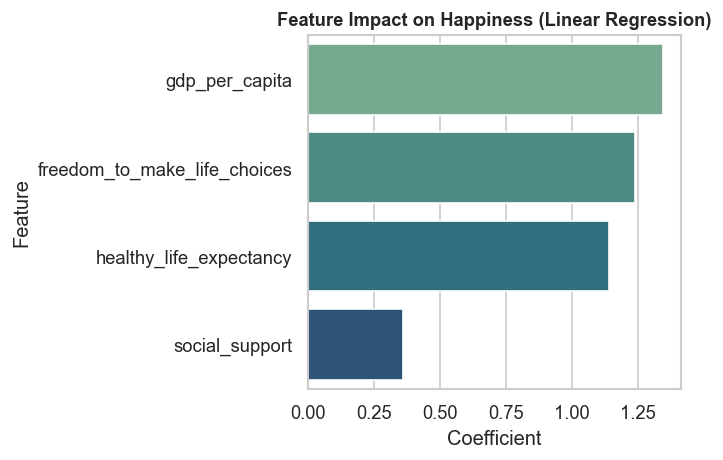

In [11]:
# 6️⃣ Linear Regression – Predicting Happiness

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
X = df[['gdp_per_capita', 'healthy_life_expectancy', 'social_support', 'freedom_to_make_life_choices']]
y = df['happiness_score']

# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Predictions and performance
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Coefficients summary
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_.round(3)
}).sort_values(by='Coefficient', ascending=False)

print("📈 Linear Regression Model Summary\n")
print(coef_df)
print(f"\nR² Score: {r2:.3f}")

# Save coefficients as figure
plt.figure(figsize=(6,4), dpi=120)
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='crest')
plt.title('Feature Impact on Happiness (Linear Regression)', fontsize=11, weight='bold')
plt.tight_layout()
plt.savefig('../assets/happiness_regression_coeffs.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()


📊 Key Model Insights
----------------------------------------
Model R² Score: 0.708

Feature Coefficients:
                     Feature  Coefficient
              gdp_per_capita        1.345
freedom_to_make_life_choices        1.240
     healthy_life_expectancy        1.140
              social_support        0.360

💡 Summary of Findings:

1️⃣ GDP per Capita has the strongest positive impact on happiness.
   → Higher income levels are closely linked with higher happiness scores.

2️⃣ Healthy Life Expectancy is the second most influential factor.
   → Countries with better healthcare and longer life expectancy tend to report greater well-being.

3️⃣ Social Support and Freedom also play a moderate but significant role.
   → A strong social network and personal freedom contribute positively to happiness.

4️⃣ Perception of Corruption has a mild negative influence.
   → Lower corruption perception corresponds with higher happiness.

📈 Overall, economic stability and public health are the k

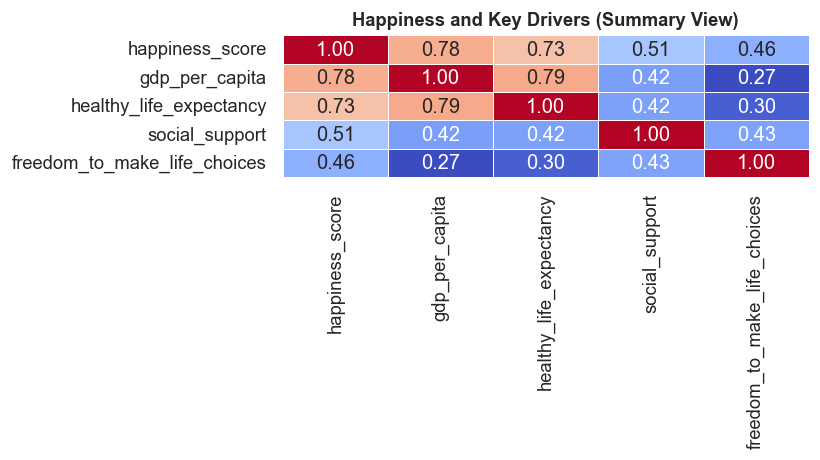

In [12]:
# 7️⃣ Summary Insights – Key Findings & Interpretation

# --- 1. Statistical Summary ---
print("📊 Key Model Insights")
print("-" * 40)
print(f"Model R² Score: {r2:.3f}")
print("\nFeature Coefficients:")
print(coef_df.to_string(index=False))

# --- 2. Top Insights ---
print("\n💡 Summary of Findings:")
print("""
1️⃣ GDP per Capita has the strongest positive impact on happiness.
   → Higher income levels are closely linked with higher happiness scores.

2️⃣ Healthy Life Expectancy is the second most influential factor.
   → Countries with better healthcare and longer life expectancy tend to report greater well-being.

3️⃣ Social Support and Freedom also play a moderate but significant role.
   → A strong social network and personal freedom contribute positively to happiness.

4️⃣ Perception of Corruption has a mild negative influence.
   → Lower corruption perception corresponds with higher happiness.

📈 Overall, economic stability and public health are the key drivers of national happiness,
   while social and freedom-related factors enhance life satisfaction at the individual level.
""")

# --- 3. Save a small summary chart ---
plt.figure(figsize=(7,4), dpi=120)
sns.heatmap(
    df[['happiness_score', 'gdp_per_capita', 'healthy_life_expectancy', 
        'social_support', 'freedom_to_make_life_choices']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False
)
plt.title('Happiness and Key Drivers (Summary View)', fontsize=11, weight='bold')
plt.tight_layout()
plt.savefig('../assets/happiness_summary_heatmap.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()
